In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline
from fintextmin import *
from matplotlib.font_manager import FontProperties
import collections
import functools
import operator

# 讀文件、剔除字

In [2]:
text_list, file_names = read_text_folder('./Text_Folder/', return_names=True) # 把檔案全部丟到 Text_Folder/ 資料夾裡面統一讀
text_label = ['內控' for i in range(len(text_list))] # 用迴圈做出標籤
text_name = ['內控'+str(i+1) for i in range(len(text_list))] # 用迴圈做出文件名稱

cwd = count_words_in_documents(text_list, text_name,
                               stopwords=['０','１','２','３','４','５','６','可能','必須','於','７','｜','|','原則','功能性','/','貨幣','交易','８','９','對','來','/','是','在','這樣','之','公司','內部','控制','的','與','內控','應計','計數'],
                               puncs=set_puncs('-－—─'),
                               stop_pattern='[A-Za-z0-9]+')
wfm = create_word_frequency_matrix(cwd)
df_tfidf = evaluate_tfidf(wfm)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 1.486 seconds.
Prefix dict has been built succesfully.


# 跑文字雲

In [3]:
linux_font = r'/usr/share/fonts/truetype/wqy/wqy-microhei.ttc'
windows_font = r'C:/Windows/Fonts/kaiu.ttf'
using_font = windows_font

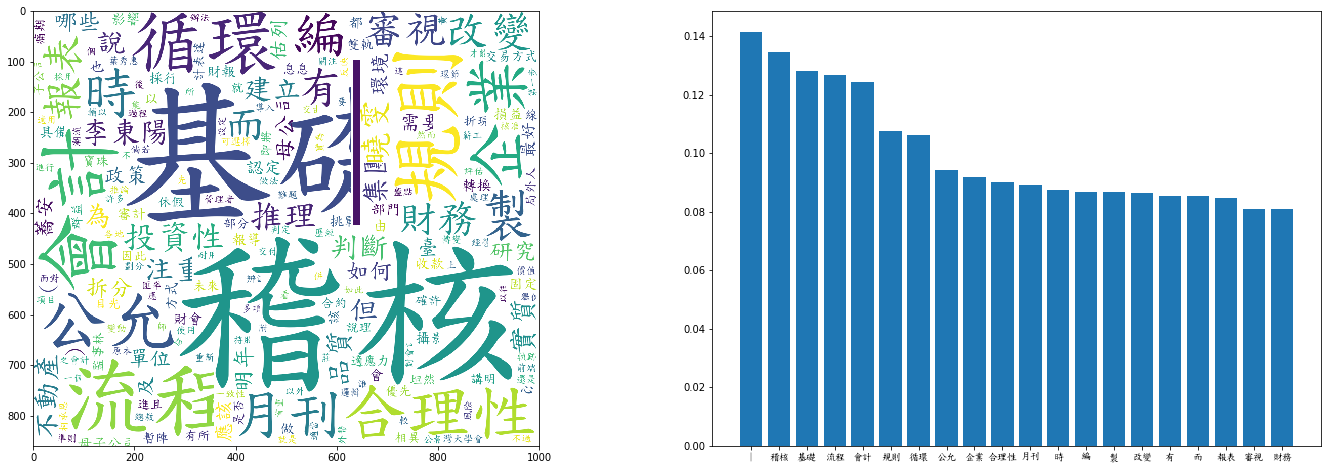

In [4]:
plt.figure(figsize=(24, 8))
ax1 = plt.subplot(121)
plot_tfidf_wordcloud(df_tfidf, ax1, font_path=using_font)

ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, ax=ax2,font_path=using_font, color='C0', xticks_fontsize=12)

# PCA降維

In [5]:
df_tfidf.index = text_name # 幫 tfidf 矩陣加上文件編號
pca_df_tfidf = PCA_tfidf(df_tfidf, n_components=3) #降成3維

# 用 PCA_tfidf()做出來的pca矩陣可以看到對應的文件編號 
pca_df_tfidf

,0,1,2
內控1,-0.129593,-0.132005,-0.199532
內控2,-0.142537,-0.146061,-0.143765
內控3,0.232054,-0.169755,-0.095544
內控4,-0.165841,0.173929,-0.087926
內控5,-0.134581,0.193263,0.154927
內控6,0.135971,-0.071252,-0.091204
內控7,0.340712,-0.041315,-0.135675
內控8,0.088619,-0.199763,-0.167973
內控9,0.054497,0.015937,0.032700
內控10,-0.105315,-0.129750,0.276895


# k-means 分群

In [6]:
# 用 KMeans_tfidf()做 KMeans
# 第一個位置放 pca_df_tfidf
# 第二個位置放原本 kmeans = KMeans(n_clusters=3) 的等號右邊
# 第三個位置 True的話只會把分群顯示出來， False可以拿到完整的矩陣 預設為True
tfidf_clustered = KMeans_tfidf(pca_df_tfidf, KMeans(n_clusters=3), only_label=False)

In [7]:
tfidf_clustered.columns #看一下資料的欄位，數字的地方是pca的維度， Label是分群

Index([0, 1, 2, 'Label'], dtype='object')

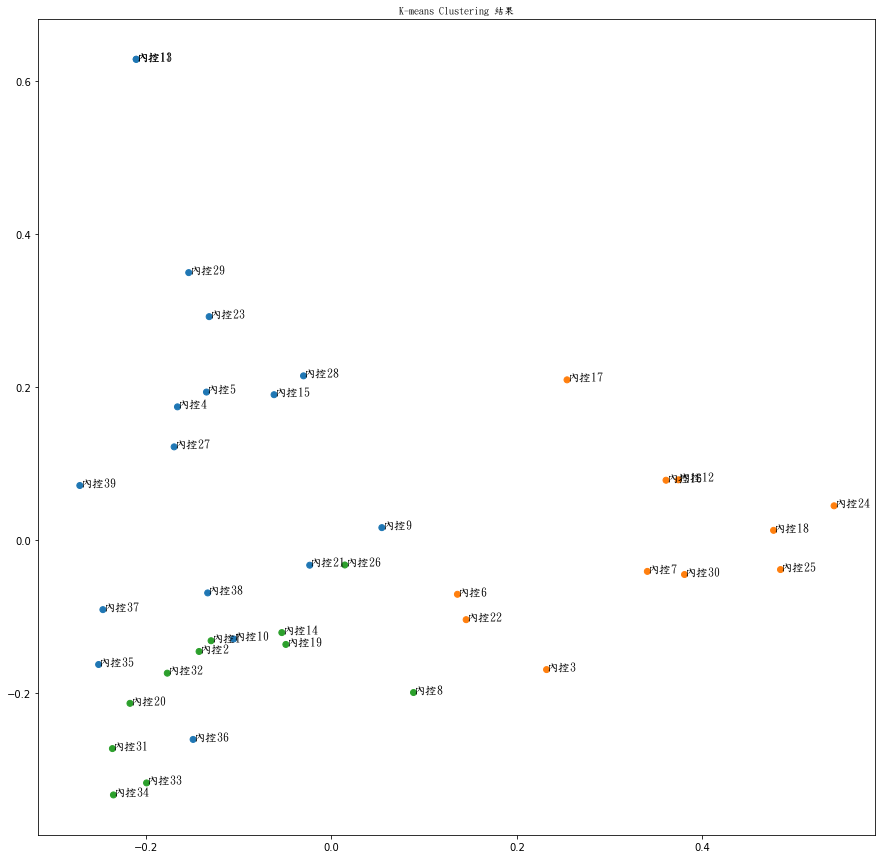

In [17]:
plot_kmeans_scatter(tfidf_clustered[[0, 1,'Label']],
                    figsize = (15,15),
                    label_color_map = {0:'C2', 1:'C0', 2:'C1'},
                    title = "K-means Clustering 結果",
                    title_fontsize = 28,
                    font_path=using_font)

In [9]:
n_clusters=3
tfidf_group = tfidf_clustered.groupby('Label')
text_name_group = {i: list(tfidf_group.get_group(i).index) for i in range(n_clusters)}

In [10]:
text_list_group = {}
for i in range(n_clusters):
    boolindx = [j for j in map(lambda x: x in text_name_group[i], text_name)]
    text_list_group[i] =  [t for (t, b) in zip(text_list, boolindx) if b]

In [11]:
cwd_group = {}
for i in range(n_clusters):
    cwd_group[i] = count_words_in_documents(text_list_group[i], text_name_group[i],
                               stopwords=['０','１','２','３','４','５','６','７','８','９','之','公司','內部','控制','的','與','內控','應計','計數'],
                               puncs=set_puncs('-－—─'),
                               stop_pattern='[A-Za-z0-9]+')
    cwd_group[i] = functools.reduce(operator.add, map(collections.Counter, cwd_group[i].values()))
    cwd_group[i] = dict(cwd_group[i])

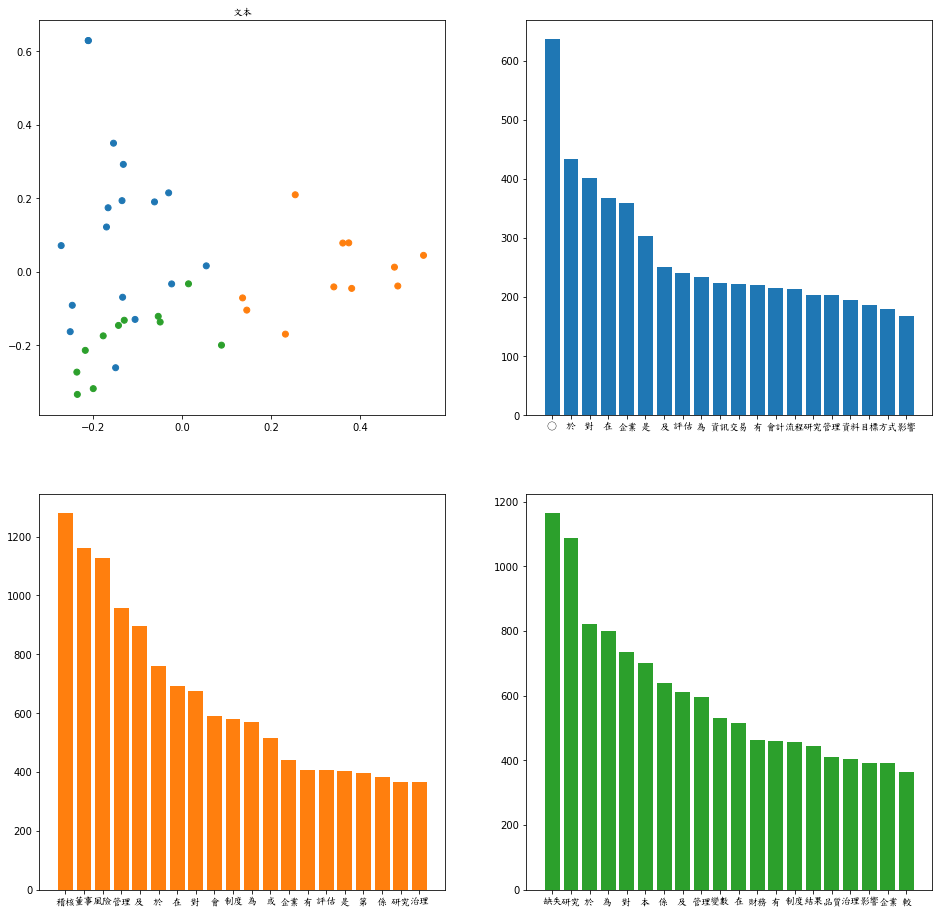

In [18]:
plt.figure(figsize=(16,16))

ax1 = plt.subplot(221)
plot_kmeans_scatter(tfidf_clustered[[0, 1,'Label']],
                    ax = ax1,
                    figsize = (10,8),
                    label_color_map = {0:'C2', 1:'C0', 2:'C1'},
                    title = '文本',
                    title_fontsize = 50,
                    annotate = False,
                    font_path=using_font)

ax2 = plt.subplot(222)
plot_tf_bar(cwd_group[0], ax2, color='C0', font_path=using_font)

ax3 = plt.subplot(223)
plot_tf_bar(cwd_group[1], ax3, color='C1', font_path=using_font)

ax4 = plt.subplot(224)
plot_tf_bar(cwd_group[2], ax4, color='C2', font_path=using_font)